[0.0, 0.0, 0.0016564451684387693, 0.0032080661464212058, 0.004893817277825769, 0.00564247200152866, 0.0053305962184319496, 0.006395030767815217, 0.0072588649100082895, 0.008579687139120884, 0.009504153146104977, 0.009287188967957938, 0.011070840530526996, 0.012878523734206893, 0.013862684699659844, 0.013564531009120168, 0.014753222774840757, 0.016997308284223467, 0.018254622714172497, 0.01815594631058881, 0.01807041796183606, 0.020787441135049267, 0.022502203233415063, 0.022834442326250814, 0.02157405422048031, 0.024107692113707446, 0.026417785122904214]
[0.0, 6.516005094378552e-05, 0.0002449776883129782, 0.00041828041490606354, 0.0005479501518308016, 0.0006545123667818873, 0.0007322557378000487, 0.0007465932956366335, 0.0008532943418944269, 0.0010167961216346537, 0.0011115127580833646, 0.0012462940219408617, 0.001325461258463596, 0.0014531040887192474, 0.0015678657732852521, 0.0016314693361758883, 0.0017893316273299344, 0.0018682447317328993, 0.001982215520443851, 0.002110581515829816

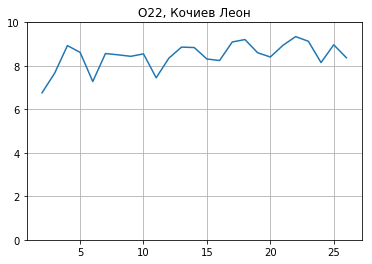

In [3]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

#Параметры 
a = 0.6
b = 1.2
rMIN = 0.1
rMAX = 1.8
delta = -(3.5) / 2

c = 1.5
C = 0.8
d = 1

I = 50
N = 0.5
h = (rMAX - rMIN) / I
tau = C * h / c
nt = int(N / tau)

alpha = 3

r1 = [rMIN + (i - 0.5)*h for i in range(I + 2)]

#Шапка
def v(r):
    if (r < b) & (r > a):
        return m.exp((-4*(2*r - (a + b))**2) / ((b - a)**2 - (2*r - (a + b))**2))
    else:
        return 0

def V(r):
    return v(r) * ((-16*(2*r - a - b)*((b - a)**2 - (2*r - a - b)**2) - 16*(2*r - a - b)**2 * (2*r - (a + b))) /
                   ((b - a)**2 - (2 * r - (a + b))**2)**2)

def du_dr(r, t):
    return (1 - d) / 2 * r**(-(1 + d) / 2) * v(c ** t - r - delta) - r**((1 - d) / 2) * V(c * t - r - delta)


#Численное решение
def u(I):

    h = (rMAX - rMIN) / I
    tau = C * h / c
    nt = int(N / tau)

    r = [rMIN + (i - 0.5)*h for i in range(I + 2)]

    a1 = [tau**2 * c**2 * r[i]**(1-d) / h for i in range(I + 2)]
    a2 = [(r[i] + h/2)**(d-1) / h for i in range(I + 2)]
    a3 = [(r[i] - h/2)**(d-1) / h for i in range(I + 2)]

    u0 = [r[i]**((1 - d)*0.5) * v(-r[i] - delta) for i in range(I + 2)]
    u1 = [r[i]**((1 - d)*0.5) * v(c*tau -r[i] - delta) for i in range(I + 2)]

    u_next = [0 for i in range(I + 2)]
    u_prev = u0.copy()
    u_curr = u1.copy()

    sol = [[0 for i in range(1, I + 1)] for n in range(nt)]
    sol[0] = u0[1:I + 1]

    for n in range(1, nt):
        sol[n] = u_curr[1:I+1]
        for i in range(1, I + 1):
            u_next[i] = 2*u_curr[i] - u_prev[i] + a1[i] * (a2[i] * (u_curr[i + 1] - u_curr[i]) - a3[i] * (u_curr[i] - u_curr[i - 1]))

        u_prev = u_curr.copy()
        u_curr = u_next.copy()

        u_curr[0] = u_curr[1] + h * du_dr(rMIN, n*tau)
        u_curr[I + 1] = u_curr[I] + h * du_dr(rMAX, n*tau)

    return sol

sol1 = u(I)
sol2 = u(alpha * I)

#Аналитическое решение
def analytic(I):
    h = (rMAX - rMIN) / I
    tau = C * h / c
    nt = int(N / tau)
    r = [rMIN + (i - 0.5)*h for i in range(I + 2)]
    an_sol = [[] for n in range(nt)]
    for n in range(nt):
        an_sol[n] = [r[i]**((1 - d) / 2) * v(c*tau*n - r[i] - delta) for i in range(1, I + 1)]
    return an_sol

an_sol1 = analytic(I)
an_sol2 = analytic(alpha*I)

r1 = [rMIN + (i - 0.5)*h for i in range(I + 2)]
r2 = [rMIN + (i - 0.5)*h/alpha for i in range((I + 2)*alpha)]

d1 = [[0 for i in range(I)] for n in range(nt)]
d2 = [[0 for i in range(alpha*I)] for n in range(alpha*nt)]
for n in range(nt):
    for i in range(I):
        d1[n][i] = abs(an_sol1[n][i] - sol1[n][i])
        
for n in range(alpha*nt):
    for i in range(alpha*I):
        d2[n][i] = abs(an_sol2[n][i] - sol2[n][i])

u1m = [0 for n in range(nt)]
u2m = [0 for n in range(nt)]
for n in range(nt):
    u1m[n] = max(d1[n])
n0 = 0
for n in range(alpha*nt):
    if (n % alpha == 0):
        u2m[int(n / 3)] = max(d2[int(n)])
        n0 += 1

al = [(u1m[n] / u2m[n]) for n in range(2, nt)]
time = [n for n in range(2, nt)]

razn1 = [[0 for i in range(I)] for n in range(nt)]
for n in range(nt):
    for i in range(I):
        razn1[n][i] = sol1[n][i] - an_sol1[n][i]

razn2 = [[0 for i in range(alpha*I)] for n in range(alpha*nt)]
for n in range(alpha*nt):
    for i in range(alpha*I):
        razn2[n][i] = sol2[n][i] - an_sol2[n][i]

for n in range(nt):
     plt.plot(r2[1:alpha*I + 1], an_sol2[n])
     plt.plot(r2[1:alpha*I + 1], sol2[n])
     plt.plot(r2[1:alpha*I + 1], razn2[n])
     plt.savefig('/home/nullkatar/Документы/' + str(n) + '.png')
     plt.close()

plt.plot(time, al)
plt.ylim(0, 10)
plt.title("О22, Кочиев Леон")
plt.grid()
plt.show()